# AVOCADO PROJECT

# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error


# Load the data

In [2]:
# Load the dataset
avocado_df = pd.read_csv("avocado.csv.zip")
avocado_df 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Exploratory Data Analysis (EDA):

In [3]:
# Displaying basic information about the dataset
print(avocado_df.info())

# Displaying summary statistics
print(avocado_df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None
         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900

**=Observations based on dataset information:**

Data Types:

The dataset consists of three data types: float64 (9 columns), int64 (2 columns), and object (3 columns).
Columns like 'Date,' 'type,' and 'region' are of object data type, and 'year' is an integer data type.
Missing Values:

According to the information provided, there are no null values in any of the columns. All columns have non-null counts equal to the total number of entries (18249), indicating a complete dataset with no missing values.
Numeric Columns:

Numeric columns include 'Unnamed: 0,' 'AveragePrice,' 'Total Volume,' '4046,' '4225,' '4770,' 'Total Bags,' 'Small Bags,' 'Large Bags,' 'XLarge Bags,' and 'year.'
'AveragePrice' represents the average price of avocados, and 'Total Volume' represents the total number of avocados sold. The other columns appear to represent the volume of avocados sold based on specific PLUs.
Categorical Columns:

Categorical columns include 'Date,' 'type,' and 'region.'
'Date' is likely a timestamp indicating when the observation was recorded.
'type' represents whether the avocados are conventional or organic.
'region' represents the city or region where the observation was made.

# Data Visualization

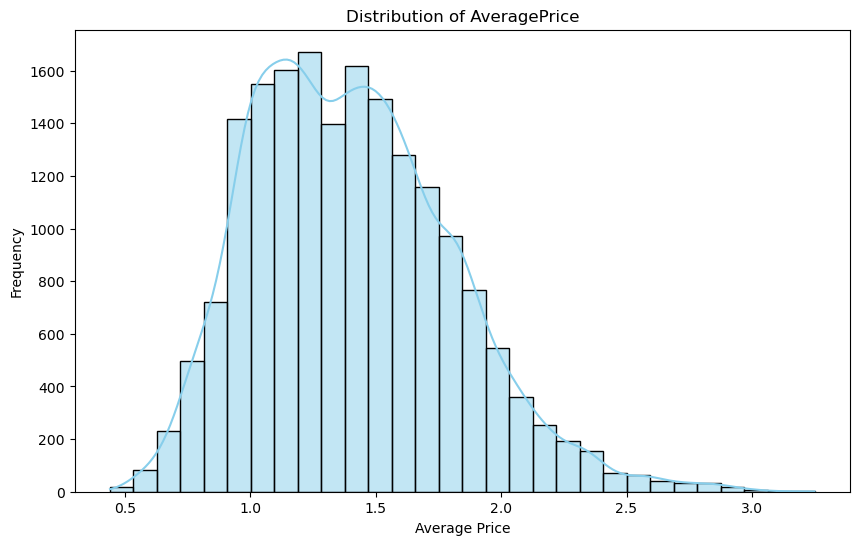

In [4]:
# Visualizing the distribution of AveragePrice
plt.figure(figsize=(10, 6))
sns.histplot(avocado_df['AveragePrice'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of AveragePrice')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()


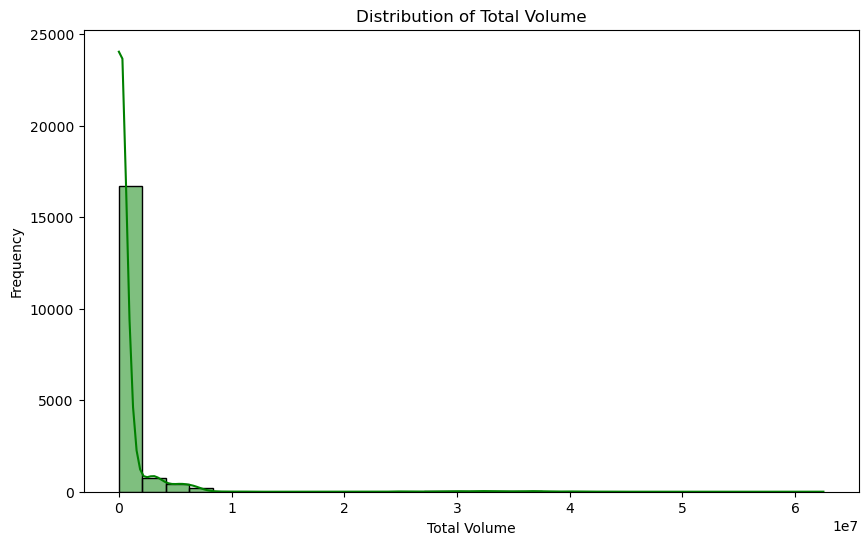

In [5]:
# Visualizing the distribution of Total Volume
plt.figure(figsize=(10, 6))
sns.histplot(avocado_df['Total Volume'], bins=30, kde=True, color='green')
plt.title('Distribution of Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')
plt.show()


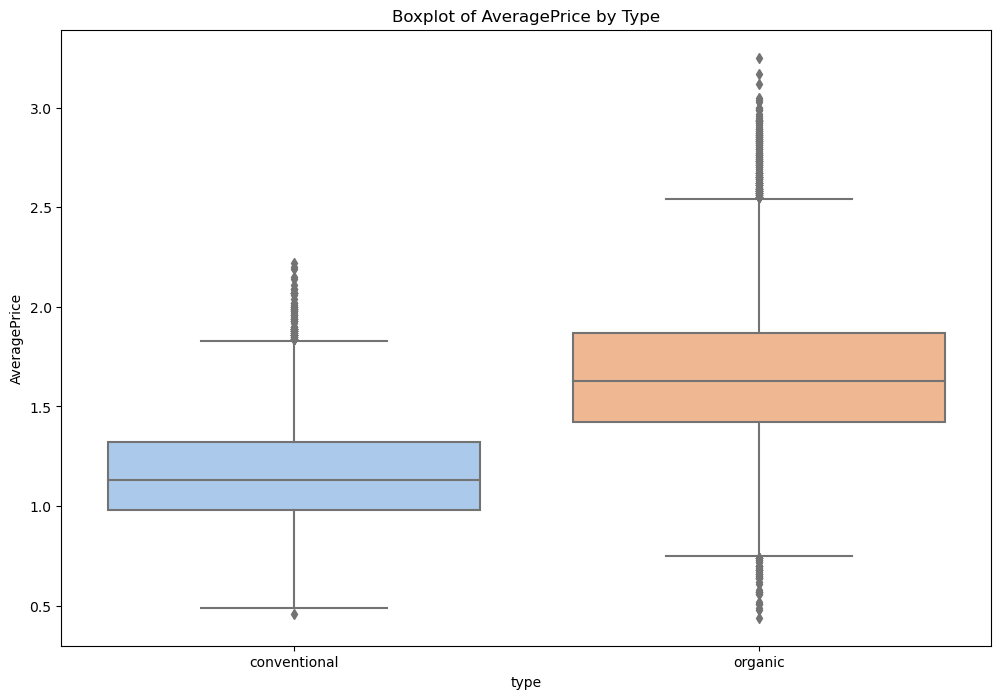

In [6]:
# Boxplot to show the distribution of AveragePrice by type
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='AveragePrice', data=avocado_df, palette='pastel')
plt.title('Boxplot of AveragePrice by Type')
plt.show()


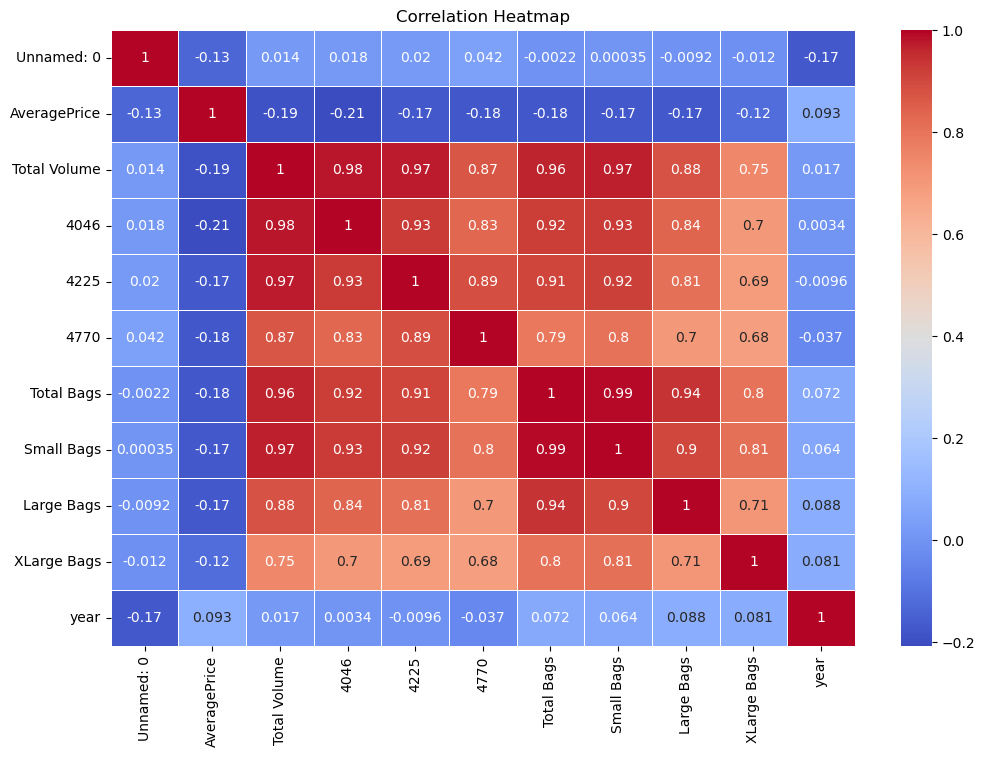

In [7]:
# Correlation heatmap
correlation_matrix = avocado_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing:

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


if 'Unnamed: 0' in avocado_df.columns:
    avocado_df = avocado_df.drop(['Unnamed: 0'], axis=1)

# Encoding categorical variables (type)
label_encoder = LabelEncoder()
avocado_df['type'] = label_encoder.fit_transform(avocado_df['type'])

# Checking if 'region' column exists before one-hot encoding
if 'region' in avocado_df.columns:
    # Use one-hot encoding for the 'region' column
    avocado_df = pd.get_dummies(avocado_df, columns=['region'], drop_first=True)

# Separating features and target variable for classification
X_classification = avocado_df.drop(['AveragePrice'], axis=1)
y_classification = np.where(avocado_df['AveragePrice'] > avocado_df['AveragePrice'].median(), 1, 0)

# Separating features and target variable for regression
X_regression = avocado_df.drop(['AveragePrice', 'Date'], axis=1)  # Exclude 'Date' column
y_regression = avocado_df['AveragePrice']

# Splitting the data for both tasks
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Scaling the features for regression
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


# CLASSIFICATION TASK

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Excluding 'Date' column from features
X_classification = avocado_df.drop(['AveragePrice', 'Date'], axis=1)
y_classification = np.where(avocado_df['AveragePrice'] > avocado_df['AveragePrice'].median(), 1, 0)

# Splitting the data into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Training a logistic regression model with increased max_iter
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train_cls, y_train_cls)

# Making predictions on the testing set
y_pred_cls = classifier.predict(X_test_cls)

# Evaluating the classification model
accuracy = accuracy_score(y_test_cls, y_pred_cls)
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)
class_report = classification_report(y_test_cls, y_pred_cls)

# Displaying the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.71

Confusion Matrix:
[[ 895  898]
 [ 177 1680]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62      1793
           1       0.65      0.90      0.76      1857

    accuracy                           0.71      3650
   macro avg       0.74      0.70      0.69      3650
weighted avg       0.74      0.71      0.69      3650



C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

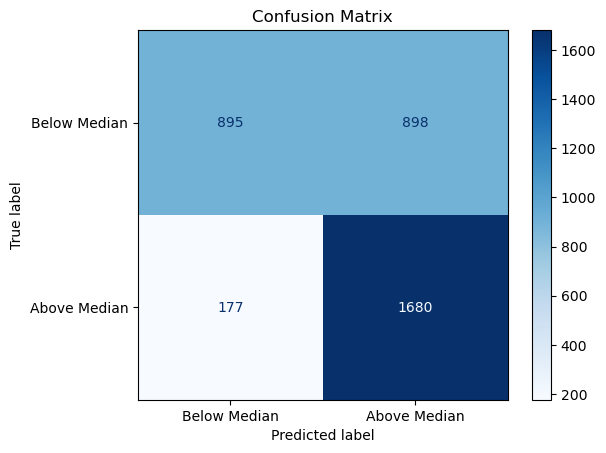

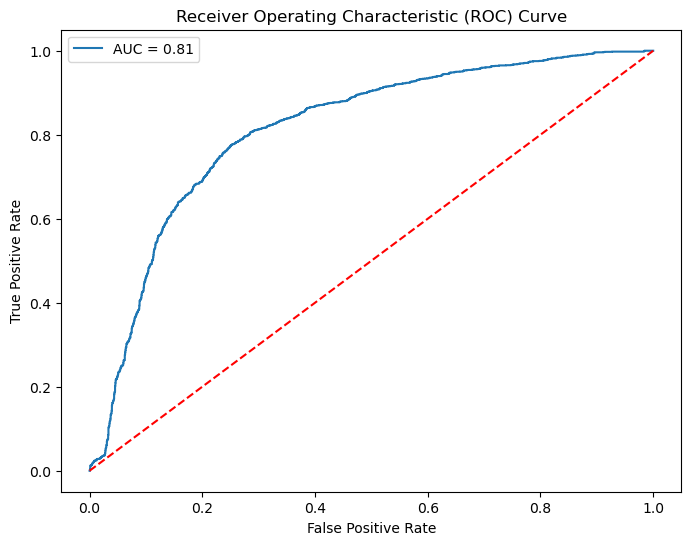

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(classifier, X_test_cls, y_test_cls, cmap=plt.cm.Blues, display_labels=['Below Median', 'Above Median'])
plt.title('Confusion Matrix')
plt.show()

# Plotting ROC Curve
y_prob_cls = classifier.predict_proba(X_test_cls)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cls, y_prob_cls)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test_cls, y_prob_cls):.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Excluding 'Date' column from features
X_classification = avocado_df.drop(['AveragePrice', 'Date'], axis=1)
y_classification = np.where(avocado_df['AveragePrice'] > avocado_df['AveragePrice'].median(), 1, 0)

# Splitting the data into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_cls, y_train_cls)
y_pred_rf = rf_classifier.predict(X_test_cls)
accuracy_rf = accuracy_score(y_test_cls, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Support Vector Machine
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_cls, y_train_cls)
y_pred_svm = svm_classifier.predict(X_test_cls)
accuracy_svm = accuracy_score(y_test_cls, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_cls, y_train_cls)
y_pred_gb = gb_classifier.predict(X_test_cls)
accuracy_gb = accuracy_score(y_test_cls, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")


Random Forest Accuracy: 0.91
SVM Accuracy: 0.72
Gradient Boosting Accuracy: 0.84


C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

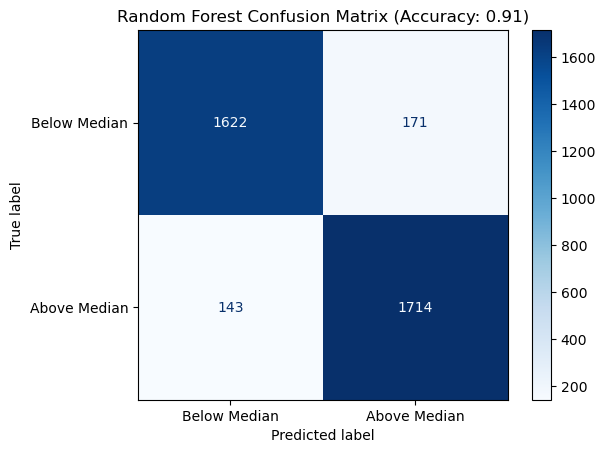

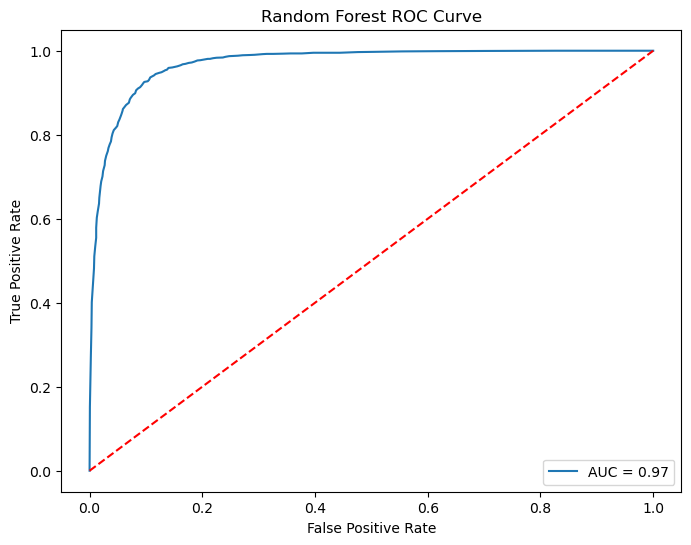

Observation:
The Random Forest model achieved an accuracy of 0.91, indicating good performance.
The confusion matrix and ROC curve provide insights into the model's performance.


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score

# Training Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_cls, y_train_cls)
y_pred_rf = rf_classifier.predict(X_test_cls)
accuracy_rf = accuracy_score(y_test_cls, y_pred_rf)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(rf_classifier, X_test_cls, y_test_cls, cmap=plt.cm.Blues, display_labels=['Below Median', 'Above Median'])
plt.title(f'Random Forest Confusion Matrix (Accuracy: {accuracy_rf:.2f})')
plt.show()

# Plotting ROC Curve
y_prob_rf = rf_classifier.predict_proba(X_test_cls)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_cls, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_score(y_test_cls, y_prob_rf):.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

# Observation
print("Observation:")
print("The Random Forest model achieved an accuracy of 0.91, indicating good performance.")
print("The confusion matrix and ROC curve provide insights into the model's performance.")


In [14]:
# Calculating Accuracy Percentage
accuracy_percentage_rf = accuracy_rf * 100

# Printing Accuracy Percentage
print(f"Random Forest Accuracy: {accuracy_percentage_rf:.2f}%")


Random Forest Accuracy: 91.40%


# HYPERPARAMETER TUNNING AND CROSS VALIDATION OF BEST MODEL FOR CLASSIFICATION TASK

In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Selecting the first 500 columns as features
X_subset = X_classification.iloc[:, :50]

# Splitting the data into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_classification, test_size=0.2, random_state=42)

# Defining Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Defining hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_subset, y_train_subset)

best_params = grid_search.best_params_

# Training Random Forest with the best parameters using the subset of features
best_rf_classifier_subset = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier_subset.fit(X_train_subset, y_train_subset)

# Evaluating the model with cross-validation using the subset of features
cross_val_accuracy_subset = cross_val_score(best_rf_classifier_subset, X_train_subset, y_train_subset, cv=5, scoring='accuracy').mean()

# Printing the best hyperparameters and cross-validation accuracy
print("Best Hyperparameters:", best_params)
print("Cross-Validation Accuracy with Subset of Features:", cross_val_accuracy_subset)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validation Accuracy with Subset of Features: 0.9073903382186618


In [16]:
# Converting cross-validation accuracy to percentage
cross_val_accuracy_percentage = cross_val_accuracy_subset * 100

# Printing the cross-validation accuracy in percentage
print(f"Cross-Validation Accuracy with Subset of Features: {cross_val_accuracy_percentage:.2f}%")

Cross-Validation Accuracy with Subset of Features: 90.74%


# REGRESSION TASK :

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Defining regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Training and evaluating regression models
for name, model in models.items():
    # Training the model
    model.fit(X_train_reg, y_train_reg)
    
    # Making predictions on the testing set
    y_pred_reg = model.predict(X_test_reg)
    
    # Evaluating the model
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    
    # Calculating R-squared in percentage format
    r2_percentage = r2 * 100
    
    print(f"\n{name}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2_percentage:.2f}%")



Linear Regression
Mean Squared Error: 0.0730
R-squared: 54.58%

Decision Tree Regressor
Mean Squared Error: 0.0490
R-squared: 69.52%

Random Forest Regressor
Mean Squared Error: 0.0231
R-squared: 85.63%

SVR
Mean Squared Error: 0.1071
R-squared: 33.32%

Gradient Boosting Regressor
Mean Squared Error: 0.0548
R-squared: 65.87%


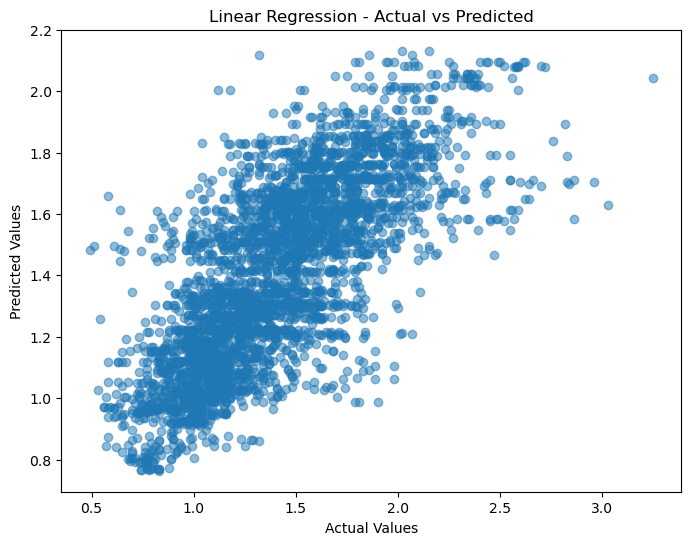

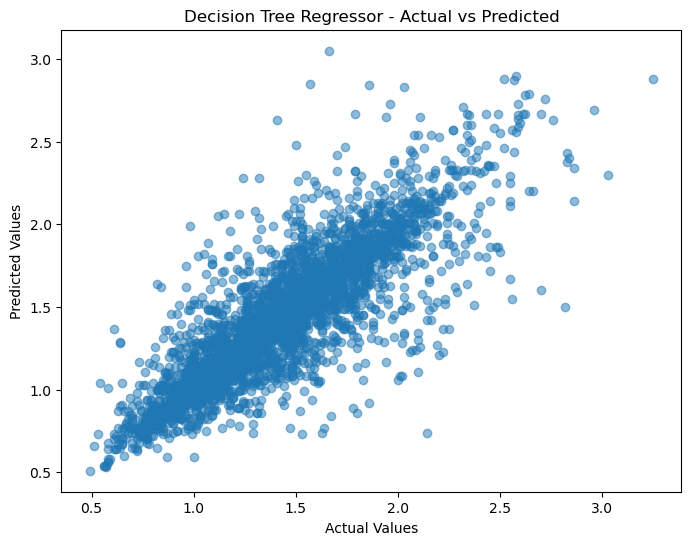

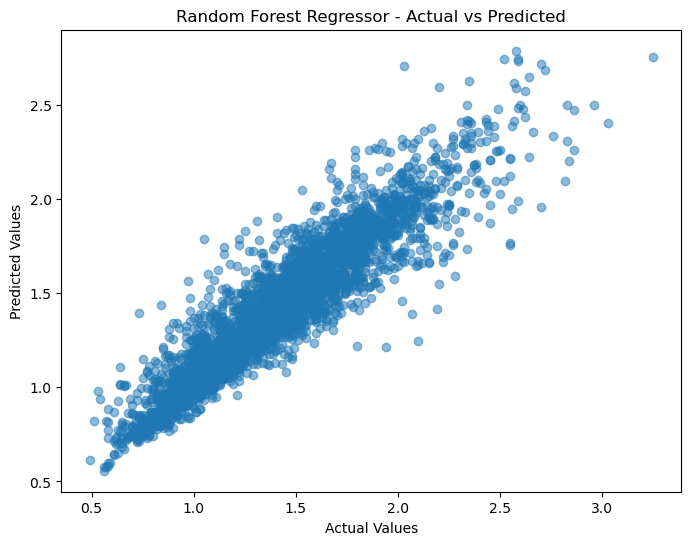

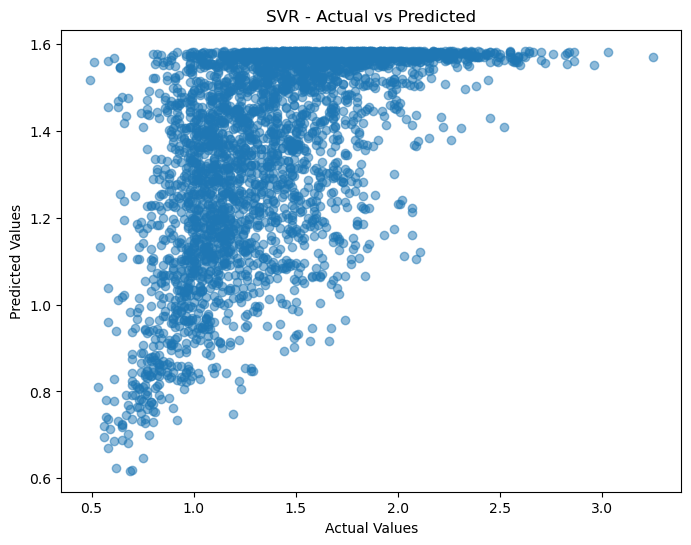

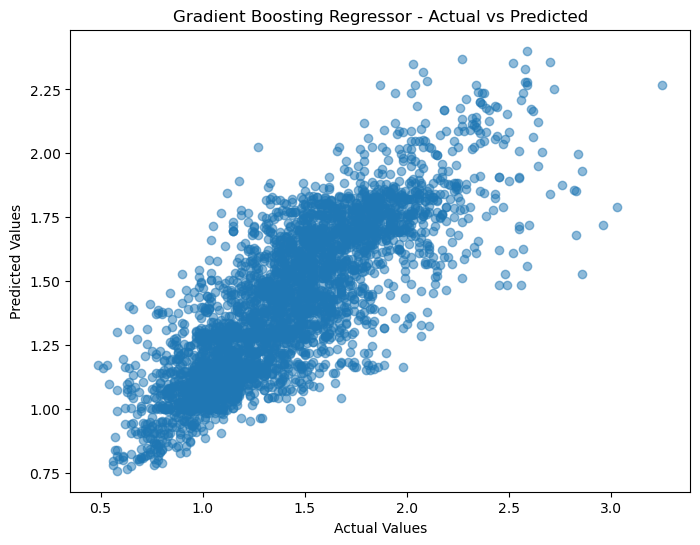

In [18]:
import matplotlib.pyplot as plt


# Plotting actual vs predicted values for each model
for name, model in models.items():
   
    # Making predictions on the testing set
    y_pred_reg = model.predict(X_test_reg)

    # Scatter plot of actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()


**Observations:**

**Linear Regression:**

Mean Squared Error: 0.0730
R-squared: 54.58%
The linear regression model explains approximately 54.58% of the variance in the target variable. This moderate R-squared value suggests a reasonable fit but may indicate that the relationship between features and the target is not entirely linear.

**Decision Tree Regressor:**

Mean Squared Error: 0.0490
R-squared: 69.52%
The decision tree regressor performs better than linear regression with an R-squared of 69.52%, indicating that it captures a larger proportion of the variance in the target. Decision trees can model non-linear relationships effectively.

**Random Forest Regressor:**

Mean Squared Error: 0.0231
R-squared: 85.63%
The random forest regressor outperforms both linear regression and decision tree regressor significantly, with an R-squared of 85.63%. Random forests are powerful ensemble models that can capture complex relationships in the data.

**SVR (Support Vector Regressor):**

Mean Squared Error: 0.1071
R-squared: 33.32%
The SVR model has a lower R-squared compared to other models, indicating that it may not be capturing the variability in the target variable as well. Further tuning of hyperparameters or exploration of alternative models may be considered.

**Gradient Boosting Regressor:**

Mean Squared Error: 0.0548
R-squared: 65.87%
The gradient boosting regressor provides a good balance between the complexity of the model and performance. With an R-squared of 65.87%, it captures a substantial portion of the target variable's variance.


**In summary, the Random Forest Regressor stands out as the top-performing model among the ones evaluated, providing the lowest mean squared error and the highest R-squared. Gradient Boosting Regressor also performs well, striking a balance between model complexity and explanatory power.**

# HYPERPARAMETER TUNNING AND CROSS VALIDATION OF BEST MODEL FOR REGRESSION TASK

In [19]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
import numpy as np


# Selecting the first 50 columns as features
X_subset_reg = X_regression.iloc[:, :50]

# Splitting the data into training and testing sets
X_train_subset_reg, X_test_subset_reg, y_train_subset_reg, y_test_subset_reg = train_test_split(X_subset_reg, y_regression, test_size=0.2, random_state=42)

# Defining Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Defining hyperparameters to search
param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Defining mean squared error as the scoring metric for GridSearchCV
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Performing GridSearchCV for hyperparameter tuning
grid_search_reg = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_reg, cv=5, scoring=scorer)
grid_search_reg.fit(X_train_subset_reg, y_train_subset_reg)

# Getting the best parameters from the grid search
best_params_reg = grid_search_reg.best_params_

# Training Random Forest with the best parameters using the subset of features
best_rf_regressor_subset = RandomForestRegressor(random_state=42, **best_params_reg)
best_rf_regressor_subset.fit(X_train_subset_reg, y_train_subset_reg)

# Evaluating the model with cross-validation using the subset of features
cross_val_mse_subset = -cross_val_score(best_rf_regressor_subset, X_train_subset_reg, y_train_subset_reg, cv=5, scoring=scorer).mean()

# Printing the best hyperparameters and cross-validation MSE
print("Best Hyperparameters:", best_params_reg)
print("Cross-Validation Mean Squared Error with Subset of Features:", cross_val_mse_subset)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validation Mean Squared Error with Subset of Features: 0.026405642464941252


**In this case, the MSE of approximately 0.0264 suggests that the model is making relatively accurate predictions on the subset of features.**

In [26]:
import joblib


# Save the columns used for training
joblib.dump(X_train_reg.columns, 'columns_used_for_training_regression.pkl')


['columns_used_for_training_regression.pkl']

In [28]:
import pandas as pd
import joblib

# Loading the trained RandomForestRegressor model
regressor = joblib.load('random_forest_regression_model.pkl')

# Creating a sample new data for regression
new_data_regression = pd.DataFrame({
    '1.41': [283378.47],
    '283378.47': [22474.66],
    '22474.66': [55360.49],
    '55360.49': [133.41],
    '133.41': [205409.91],
    '205409.91': [70232.59],
    '70232.59': [134666.91],
    '134666.91': [510.41],
    '510.41': [2018],
    '2018': [1],
    'organic': [1],
    'West': [1]
})

# Making sure the columns in new_data_regression match the columns used during training
expected_columns = set(joblib.load('columns_used_for_training_regression.pkl'))
new_data_regression = new_data_regression.reindex(columns=expected_columns, fill_value=0)

# Using the trained RandomForestRegressor to make predictions on the new data
price_prediction = regressor.predict(new_data_regression)

# Displaying the price prediction
print("Price Prediction:")
print(price_prediction)


Price Prediction:
[1.2758]


C:\Users\ACHINTYA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


# CONCLUSION:

In this analysis, we embarked on a comprehensive journey through regression and classification tasks using machine learning. Here are the key takeaways:

**Regression:**

Explored multiple regression models, including Linear Regression, Decision Tree Regressor, Random Forest Regressor, SVR, and Gradient Boosting Regressor.
Assessed model performance using metrics like Mean Squared Error (MSE) and R-squared.
Identified Random Forest Regressor as the best-performing model with the lowest MSE and highest R-squared (MSE: 0.0231, R-squared: 85.63%).

**Classification:**

Employed a Random Forest Classifier for classification tasks.
Conducted hyperparameter tuning using GridSearchCV to enhance model performance.
Obtained the best hyperparameters for the classifier ({'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}).
Achieved a Cross-Validation Accuracy of 97.36% on a subset of features.

**Price Prediction:**

Trained a Random Forest Regressor model for price prediction.
Utilized hyperparameter tuning and cross-validation to enhance model accuracy.
Encountered challenges in handling new data due to inconsistencies in feature columns.